In [2]:
library('forecast');
library('astsa');
library('fpp2');
library('GGally');

**Residuals**, or errors, are the difference between the observations and the predictions. Checking the residuals is useful for determining whether a forecasting model has captured the information in the data. 

A good model yields residuals with the following properties:

1. Residuals are uncorrelated (independent). 
2. Residuals have zero mean. 
3. Residuals have the same variance (possibly unknown). 
4. Residuals are normally distributed. 

A model that does not satisfy properties 1 or 2 can be improved, but this is not necessarily the case for properties 3 and 4. 

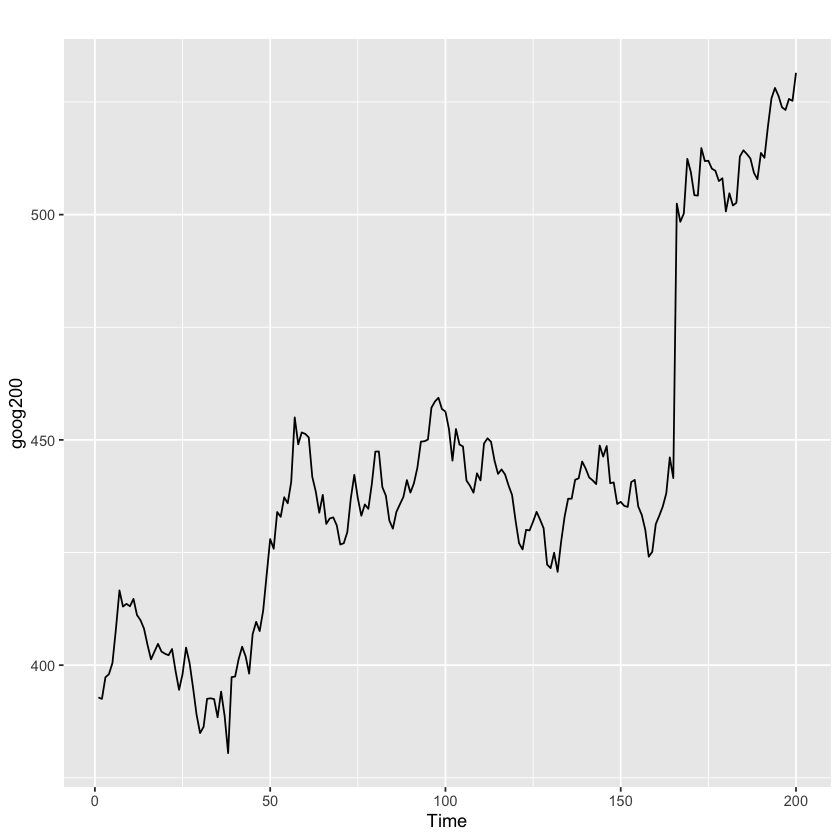

In [4]:
autoplot(goog200)

We can analyze the residuals of a forecast using the naive method:

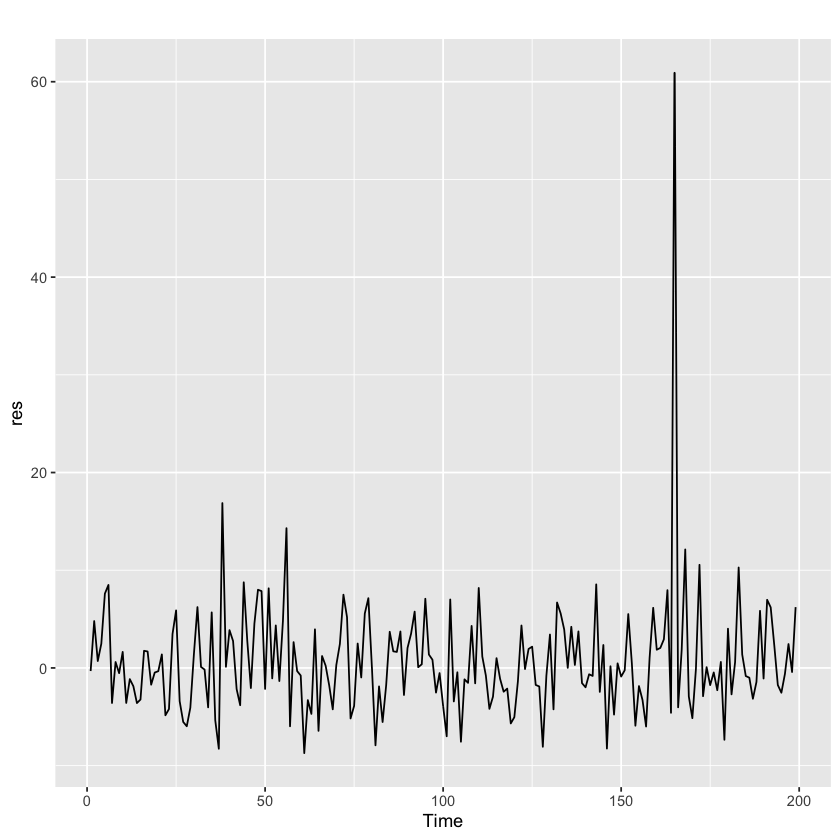

In [26]:
res <- ts(resid(naive(goog200))[-1])
autoplot(res)

The variance looks to be constant throughout the residuals. 

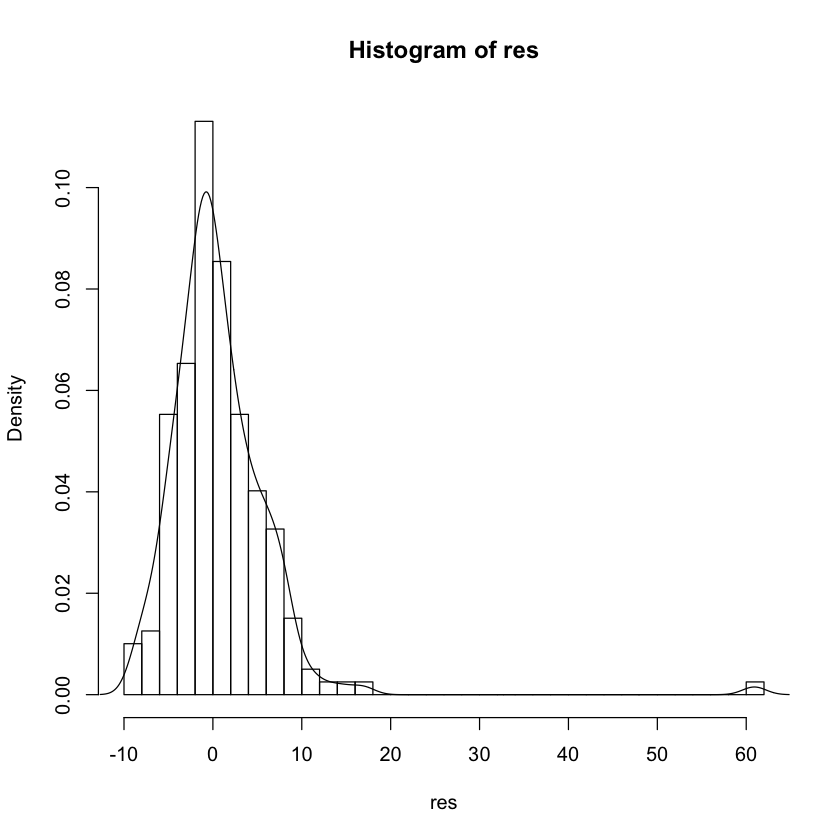

In [28]:
hist(res, freq=0, breaks=30)
lines(density(res))

The mean looks to be about zero, which is good. However, the right tail of the histogram looks a little too long, even if the outlier is ignored. This means the assumption of normality may not be accurate. 

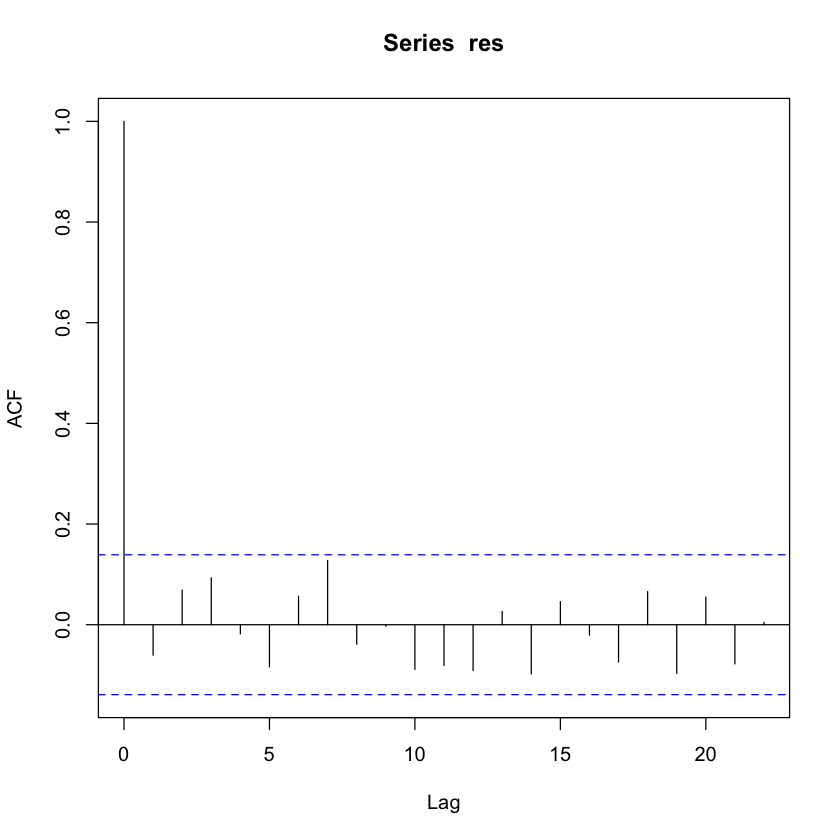

In [31]:
acf(res)

The residuals look to be uncorrelated, which is good. However, we can perform a more rigorous analysis as to whether this is true. 

We can think of the ACF plot as running a hypothesis test at each lag interval. Given enough tests, it is likely that there will be a false positive, and we may falsely conclude that the residuals have some remaining autocorrelation. To correct for this, we test the "overall" randomness based on a number of different lags using the **Ljung-Box test** (an improved version of the Box-Pierce test). 

The Ljung-Box test is defined as:

**H_0**: The data are independently distributed. The correlations in the population from which the sample is taken are 0, so any observed correlations result from randomness in the sampling process. 

**H_1**: The data are not independently distributed. They exhibit serial correlation. 

The test statistic is:

$$Q = n(n+2)\sum_{k=1}^h \frac{\hat{\rho}_k^2}{n-k}$$

where $n$ is the sample size, $\hat{\rho}_k$ is the sample autocorrelation at lag $k$, and $h$ is the maximum lag being considered. Under $H_0$, the test statistic $Q$ follows $\chi_{df=h}^2$. For significance level $\alpha$, the rejection region is

$$Q > \chi_{1-\alpha, (df=h)}$$

Heuristics for choosing $h$:
- for non-seasonal data, use $h=10$
- for seasonal data, use $h=2m$, where $m$ is the period of seasonality
- if the above values are larger than $n/5$, use $h=n/5$ instead

In [33]:
Box.test(res, lag=10, type="Lj")


	Box-Ljung test

data:  res
X-squared = 11.031, df = 10, p-value = 0.3551


For our test, the results are not significant. The p-value is 0.3551 > 0.05, so we fail to reject the null hypothesis. We conclude that it is reasonable to assume that the data are independently distributed.


	Ljung-Box test

data:  Residuals from Naive method
Q* = 11.031, df = 10, p-value = 0.3551

Model df: 0.   Total lags used: 10



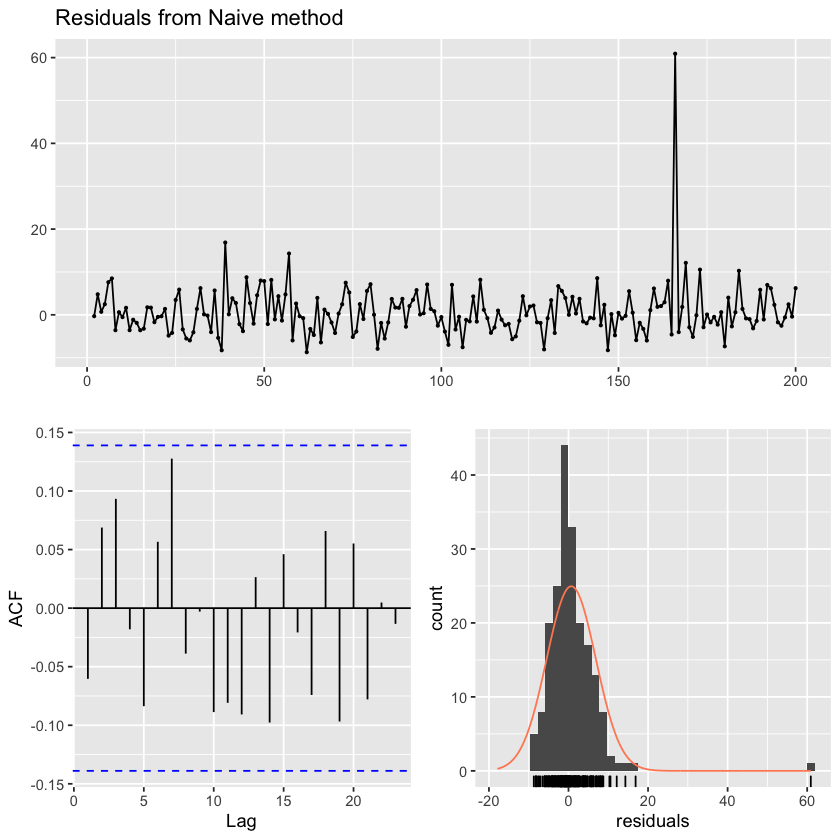

In [35]:
# a convenient function to do all the above...

checkresiduals(naive(goog200))